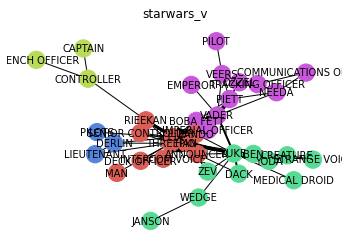

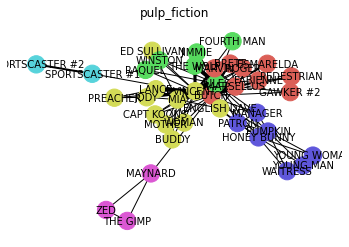

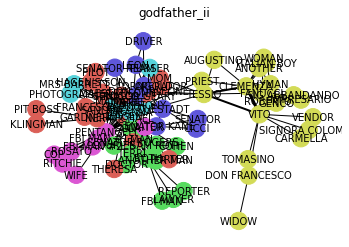

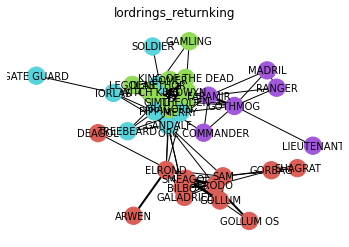

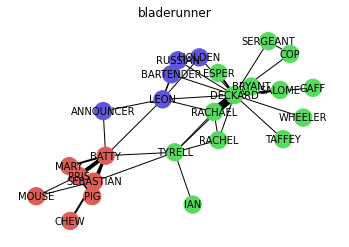

In [64]:
import numpy as np
import networkx as nx
import networkx.algorithms.community as nx_comm
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from networkx.drawing.nx_pydot import graphviz_layout

"""
partition G and
give a color to each community
"""
def divideG(G):
    communities = nx_comm.louvain_communities(G, weight='value', resolution=1, threshold=1e-07, seed=None)
    palette = sns.color_palette("hls", len(communities))

    for community in communities:
        for node in community:
            index = communities.index(community)
            G.nodes[node]["color"] = palette[index]

    return communities

"""
draw colored
"""
def drawG(G):
    pos = nx.spring_layout(G, iterations=20, weight="value")

    colors = nx.get_node_attributes(G,'color').values()
    weights = nx.get_edge_attributes(G,'value').values()

    nx.draw(G, pos, width=list(weights), node_color=list(colors), with_labels=True, font_size=10)




pathlist = Path("./movies").rglob('*.gml')
graphs = []
for path in pathlist:
    graphs.append(nx.read_gml(path))
    graphs[-1].graph["title"] = path.stem

index = 1
for graph in graphs:
    plt.figure(index)
    plt.title(graph.graph["title"])
    divideG(graph)
    drawG(graph)
    index = index + 1